In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("dataNEW - Sheet1 (1).csv")

In [3]:
df.head()

,Nitrogen Content,Phosphorous Content,Potassium Content,Temperature in Celsius,Humidity,Potential of Hydrogen,Rainfall,Crops chosen,weather_temperature,weather_humidity,solar_radiation,soil_moisture,soil_temperature
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,23.7,57.7,35,59.66,23.38
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,23.4,57.2,33,56.85,23.19
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,23.4,56.9,32,54.82,23.19
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,23.5,56.8,33,53.24,23.19
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,23.7,58.0,32,52.16,23.50


In [4]:
df.tail()

,Nitrogen Content,Phosphorous Content,Potassium Content,Temperature in Celsius,Humidity,Potential of Hydrogen,Rainfall,Crops chosen,weather_temperature,weather_humidity,solar_radiation,soil_moisture,soil_temperature
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,25.8,50.2,68,50.70,25.56
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,25.9,50.3,69,50.48,25.56
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,25.9,50.3,69,50.45,25.56
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,25.9,50.2,69,50.62,25.56
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,25.9,50.2,69,50.43,25.50


In [5]:
df

,Nitrogen Content,Phosphorous Content,Potassium Content,Temperature in Celsius,Humidity,Potential of Hydrogen,Rainfall,Crops chosen,weather_temperature,weather_humidity,solar_radiation,soil_moisture,soil_temperature
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,23.7,57.7,35,59.66,23.38
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,23.4,57.2,33,56.85,23.19
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,23.4,56.9,32,54.82,23.19
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,23.5,56.8,33,53.24,23.19
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,23.7,58.0,32,52.16,23.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,25.8,50.2,68,50.70,25.56
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,25.9,50.3,69,50.48,25.56
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,25.9,50.3,69,50.45,25.56
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,25.9,50.2,69,50.62,25.56


In [6]:
df.size

28600

In [7]:
df.shape

(2200, 13)

In [8]:
df.columns

Index(['Nitrogen Content', 'Phosphorous Content', 'Potassium Content',
       'Temperature in Celsius', 'Humidity', 'Potential of Hydrogen',
       'Rainfall', 'Crops chosen', 'weather_temperature', 'weather_humidity',
       'solar_radiation', 'soil_moisture', 'soil_temperature'],
      dtype='object')

In [9]:
df['Crops chosen'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
df.dtypes


Nitrogen Content            int64
Phosphorous Content         int64
Potassium Content           int64
Temperature in Celsius    float64
Humidity                  float64
Potential of Hydrogen     float64
Rainfall                  float64
Crops chosen               object
weather_temperature       float64
weather_humidity          float64
solar_radiation             int64
soil_moisture             float64
soil_temperature          float64
dtype: object

In [11]:
df['Crops chosen'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: Crops chosen, dtype: int64

<AxesSubplot: >

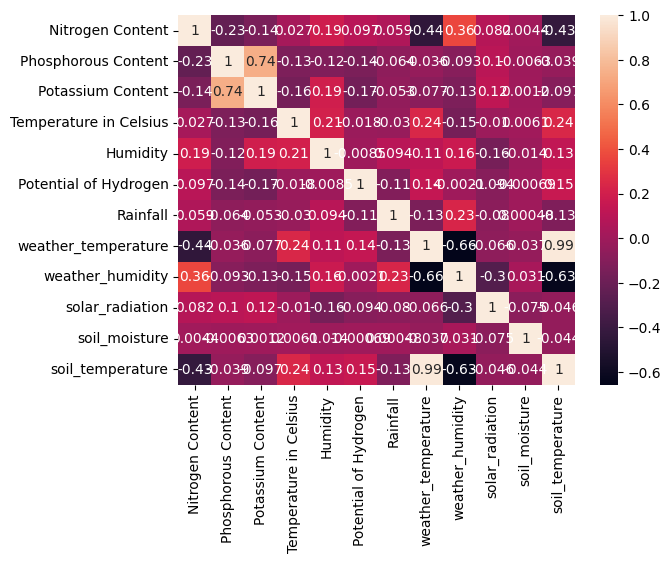

In [12]:
sns.heatmap(df.corr(),annot=True)

In [15]:
features = df[['Nitrogen Content','Phosphorous Content','Potassium Content','Temperature in Celsius','Humidity','Potential of Hydrogen','Rainfall', 'weather_temperature','weather_humidity','solar_radiation','soil_moisture','soil_temperature']]
target = df['Crops chosen']
#features = df[['Temperature in Celsius','Humidity','Potential of Hydrogen','Rainfall']]
labels = df['Crops chosen']

In [16]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [17]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

# random forest

In [18]:
from sklearn.ensemble import RandomForestClassifier as rf

RF = rf(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  99.31818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.89      0.94        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [19]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.97727273, 0.99772727, 1.        , 1.        , 0.88636364])

In [20]:
data = np.array([[85,58,41,21.77046169,80.31964408,7.038096361,226.6555374,23.4,57.2,33,56.85,23.19]])
prediction = RF.predict(data)
print("after the inputs provided by you, we recommend you to choose", prediction)

after the inputs provided by you, we recommend you to choose ['rice']


In [21]:
data = np.array([[56,65,45,38.2016825,93.97379963,6.751298936,218.0908814,29,45.1,58,50.79,28.94]])
prediction = RF.predict(data)
print("after the inputs provided by you, we recommend you to choose", prediction)

after the inputs provided by you, we recommend you to choose ['papaya']


In [22]:
import pickle


In [23]:
filename='randomforestmodel.pkl'

In [24]:
pickle.dump(RF, open(filename, 'wb'))

# decision tree

In [26]:
from sklearn.tree import DecisionTreeClassifier as DC

DT = DC(criterion="entropy",random_state=2,max_depth=5)

DT.fit(Xtrain,Ytrain)

predicted_values = DT.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  97.72727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.82      1.00      0.90        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       0.87      1.00      0.93        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00

In [27]:
score = cross_val_score(DT, features, target,cv=5)
score

array([0.94090909, 0.95      , 0.91590909, 0.97954545, 0.88636364])

In [28]:
data = np.array([[85,58,41,21.77046169,80.31964408,7.038096361,226.6555374,23.4,57.2,33,56.85,23.19]])
prediction = DT.predict(data)
print("After the assimilation of all available inputs parameters, the recommendation module recommends the crop as :", prediction)

After the assimilation of all available inputs parameters, the recommendation module recommends the crop as : ['rice']


# gaussian naive bayes

In [29]:
from sklearn.naive_bayes import GaussianNB as NB

N =NB()

N.fit(Xtrain,Ytrain)

predicted_values = N.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  98.18181818181819
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.84      0.95      0.89        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.96      0.86      0.91        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.86      0.92        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [30]:
# Cross validation score (NaiveBayes)
score = cross_val_score(N,features,target,cv=5)
score

array([0.95227273, 0.98863636, 0.99090909, 0.98863636, 0.76590909])

In [31]:
data = np.array([[85,58,41,21.77046169,80.31964408,7.038096361,226.6555374,23.4,57.2,33,56.85,23.19]])
prediction = N.predict(data)
print("after the inputs provided by you, we recommend you to choose", prediction)

after the inputs provided by you, we recommend you to choose ['rice']


# logistic regression


In [154]:
from sklearn.linear_model import LogisticRegression as LG

LR = LG(random_state=2)

LR.fit(Xtrain,Ytrain)

predicted_values = LR.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  98.18181818181819
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.92      0.82      0.87        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00    

In [147]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LR,features,target,cv=5)
score


array([0.94318182, 0.98181818, 0.98409091, 0.98409091, 0.96363636])

In [148]:
data = np.array([[85,58,41,21.77046169,80.31964408,7.038096361,226.6555374,23.4,57.2,33,56.85,23.19]])
prediction = LR.predict(data)
print("after the inputs provided by you, we recommend you to choose", prediction)

after the inputs provided by you, we recommend you to choose ['rice']


# svm

In [155]:

from sklearn.svm import SVC as ss
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing data
X_test_norm = norm.transform(Xtest)
S = ss(kernel='poly', degree=3, C=1)
S.fit(X_train_norm,Ytrain)
predicted_values = S.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  98.4090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.82      0.90        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       0.96      1.00      0.98        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [150]:
# Cross validation score (SVM)
score = cross_val_score(S,features,target,cv=5)
score

array([0.96818182, 0.98409091, 0.98181818, 0.98863636, 0.97727273])

<AxesSubplot: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

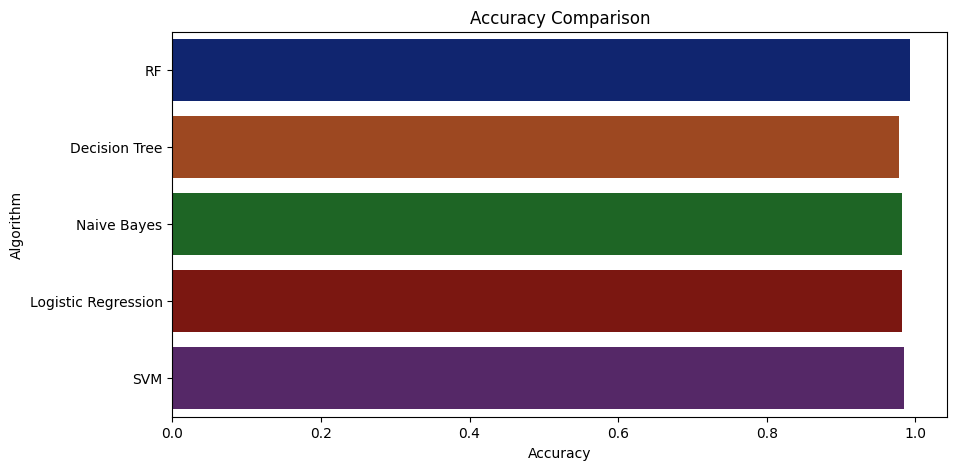

In [151]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')